In [60]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

In [2]:
df = pd.read_csv('train.csv', parse_dates=['Datetime'])
df.head()

,Datetime,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power
0,2006-12-16 17:00:00,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,4.222889
1,2006-12-16 18:00:00,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,3.632200
2,2006-12-16 19:00:00,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,3.400233
3,2006-12-16 20:00:00,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,3.268567
4,2006-12-16 21:00:00,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,3.056467


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26671 entries, 0 to 26670
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Datetime               26671 non-null  datetime64[ns]
 1   Global_reactive_power  26541 non-null  float64       
 2   Voltage                26541 non-null  float64       
 3   Global_intensity       26541 non-null  float64       
 4   Sub_metering_1         26541 non-null  float64       
 5   Sub_metering_2         26541 non-null  float64       
 6   Sub_metering_3         26541 non-null  float64       
 7   Global_active_power    26671 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.6 MB


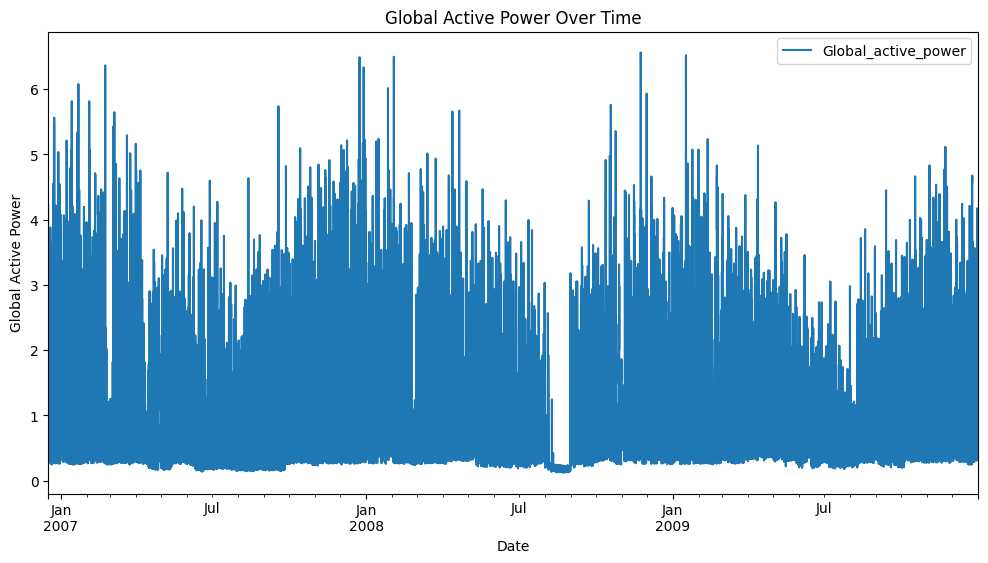

In [5]:
plot = df.plot(x="Datetime", y="Global_active_power", figsize=(12, 6))
plot.set_xlabel("Date")
plot.set_ylabel("Global Active Power")
plot.set_title("Global Active Power Over Time")
plt.show()

In [7]:
# check stationary
def check_stationary(df, col):
    result = adfuller(df[col])
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

check_stationary(df, 'Global_active_power')

ADF Statistic: -12.516396378017065
p-value: 2.6057897221446027e-23
Critical Values:
   1%: -3.4305956681066414
   5%: -2.861648578156488
   10%: -2.5668277929273207


In [10]:
#differecing
df['Global_active_power_diff'] = df['Global_active_power'].diff()
df['Global_active_power_diff'].dropna(inplace=True)

In [53]:
df.dropna(inplace=True)

In [54]:
# check stationary with adfuller
result2 = adfuller(df['Global_active_power_diff'])
print(f'ADF Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')
print('Critical Values:')
for key, value in result2[4].items():
    print(f'   {key}: {value}')



ADF Statistic: -37.02189635547019
p-value: 0.0
Critical Values:
   1%: -3.43059688311764
   5%: -2.861649115133672
   10%: -2.5668280787482076


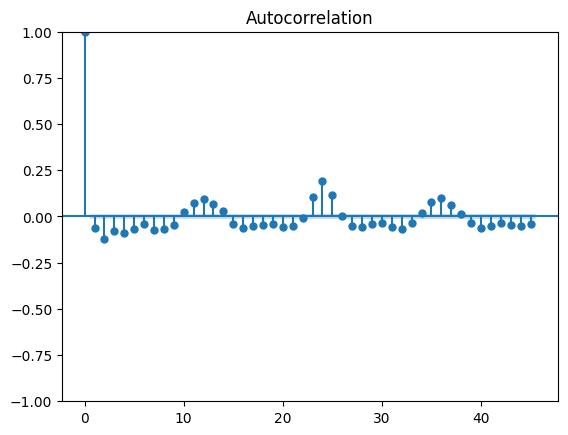

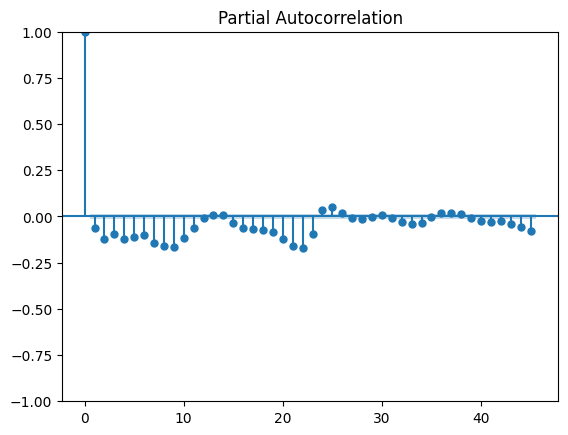

In [61]:
# plot pacf and acf
plot_acf(df['Global_active_power_diff'])
plot_pacf(df['Global_active_power_diff'])
plt.show()

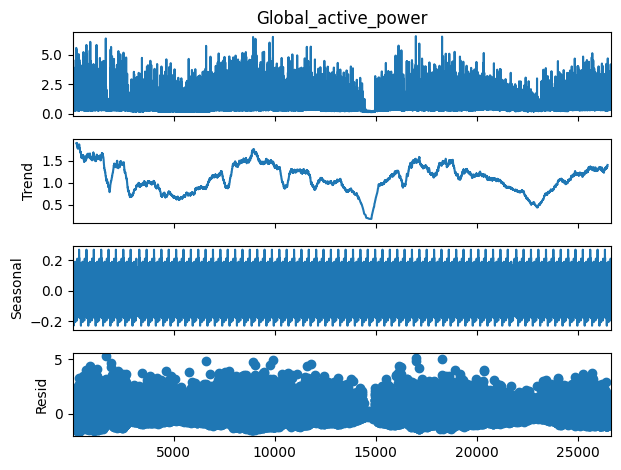

In [64]:
# check seasonal decomposition
decomposition = seasonal_decompose(df['Global_active_power'], model='additive', period=365)
decomposition.plot()
plt.show()


In [55]:
from pmdarima.model_selection import train_test_split

# use df
train, test = train_test_split(df, train_size=0.8)


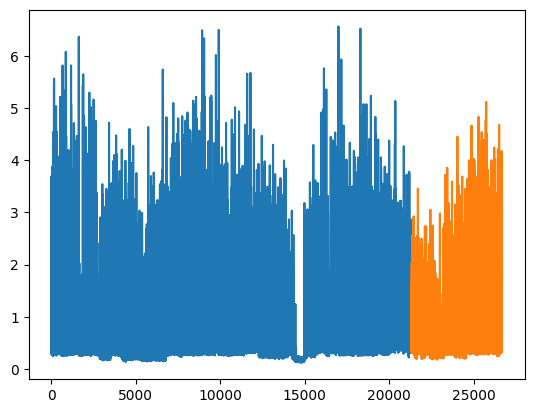

In [56]:
plt.plot(train['Global_active_power'])
plt.plot(test['Global_active_power'])

In [17]:
model = auto_arima(train['Global_active_power'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=52.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=46094.433, Time=4.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=46022.689, Time=3.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=45996.920, Time=14.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=46092.434, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=56.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=45362.339, Time=11.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=54.81 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=43389.715, Time=36.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=42336.361, Time=71.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=77.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=124.49 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=42487.818, Time=78.77 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=91.46 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=i

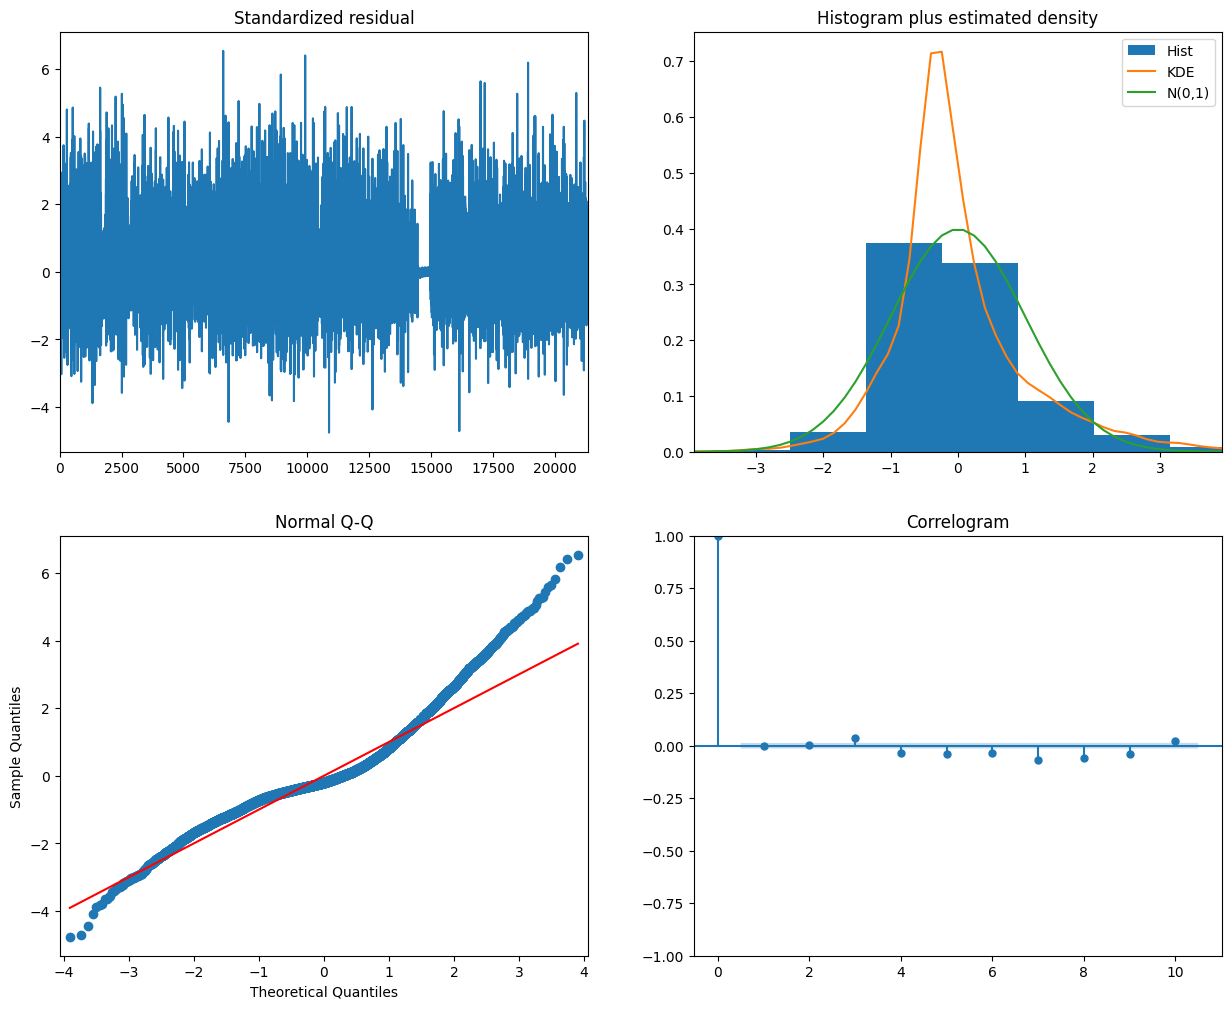

In [19]:
# plot
model.plot_diagnostics(figsize=(15, 12))
plt.show()

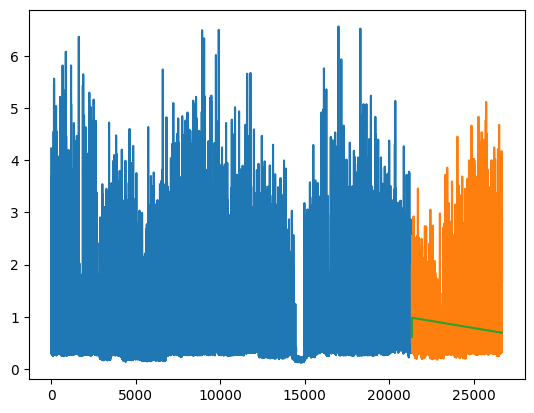

In [21]:
# make prediction
prediction = pd.DataFrame(model.predict(n_periods=len(test)), index=test.index)

# plot prediction
plt.plot(train['Global_active_power'], label='Train')
plt.plot(test['Global_active_power'], label='Test')
plt.plot(prediction, label='Prediction')
plt.show()


In [22]:
# check MAE
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(test['Global_active_power'], prediction))


0.6427899206669652


In [57]:
# train Best model:  ARIMA(1,1,3)(0,0,0)[0] intercept
model2 = SARIMAX(train['Global_active_power'], order=(1, 1, 3), seasonal_order=(0, 0, 0, 0))

# fit
model2_fit = model2.fit()


c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Kresna\miniconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


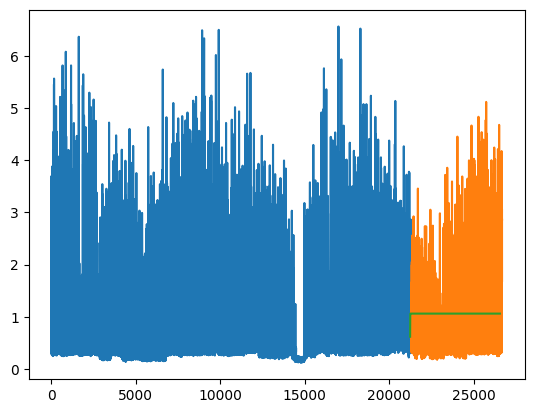

In [58]:
# predict
prediction2 = model2_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False, typ='levels').rename('SARIMA(1,1,3)(0,0,0)[0] Predictions')

# plot
plt.plot(train['Global_active_power'], label='Train')
plt.plot(test['Global_active_power'], label='Test')
plt.plot(prediction2, label='Prediction')
plt.show()

In [59]:
# check MAE
print(mean_absolute_error(test['Global_active_power'], prediction2))

0.6681201828976828


In [43]:
# try predict
future = pd.DataFrame({'Datetime': pd.date_range(start='2010-01-01 00:00:00', end='2010-11-26 21:00:00', freq='H')})
future



,Datetime
0,2010-01-01 00:00:00
1,2010-01-01 01:00:00
2,2010-01-01 02:00:00
3,2010-01-01 03:00:00
4,2010-01-01 04:00:00
...,...
7913,2010-11-26 17:00:00
7914,2010-11-26 18:00:00
7915,2010-11-26 19:00:00
7916,2010-11-26 20:00:00


In [45]:
# the predict global active power for future
future['Global_active_power'] = model2_fit.predict(n_periods=len(future))
future

,Datetime,Global_active_power
0,2010-01-01 00:00:00,0.000000
1,2010-01-01 01:00:00,4.222889
2,2010-01-01 02:00:00,3.672070
3,2010-01-01 03:00:00,3.503650
4,2010-01-01 04:00:00,3.408280
...,...,...
7913,2010-11-26 17:00:00,1.272462
7914,2010-11-26 18:00:00,1.482985
7915,2010-11-26 19:00:00,1.501918
7916,2010-11-26 20:00:00,1.545098


In [49]:
# save to csv
future.to_csv('forecast3.csv', index=False)

In [101]:
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
import lightgbm as lgb

def create_forecaster():

    # creating forecaster with LightGBM
    regressor = lgb.LGBMRegressor()
    forecaster = make_reduction(regressor, window_length=5, strategy="recursive")

    return forecaster


def grid_serch_forecaster(train, test, forecaster, param_grid):

    # Grid search on window_length
    cv = ExpandingWindowSplitter(initial_window=int(len(train) * 0.7))
    gscv = ForecastingGridSearchCV(
        forecaster, strategy="refit", cv=cv, param_grid=param_grid, 
        scoring=MeanAbsolutePercentageError(symmetric=True)
    )
    gscv.fit(train)
    print(f"best params: {gscv.best_params_}")

    # forecasting
    fh = np.arange(len(test)) + 1
    y_pred = gscv.predict(fh=fh)
    mae, mape = plot_forecast(train, test, y_pred)

    return mae, mape


def plot_forecast(train, test, y_pred):
    
        # plot
        fig, ax = plt.subplots(figsize=(12, 6))
        train.plot(ax=ax, label="train")
        test.plot(ax=ax, label="test")
        y_pred.plot(ax=ax, label="forecast")
        ax.legend()
    
        # calculate MAE and MAPE
        mae = mean_absolute_error(test, y_pred)
        mape = np.mean(np.abs((test - y_pred) / test)) * 100
    
        return mae, mape

param_grid = {"window_length": [5, 10, 15, 20, 25, 30]}
forecaster = create_forecaster()
mae, mape = grid_serch_forecaster(train['Global_active_power'], test['Global_active_power'], forecaster, param_grid)
